In [1]:
# importing libraries for data exploration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\timos\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# read in csv file from NASA FIRMS, treating data as time series and setting acq_date to index.
df = pd.read_csv('DL_FIRE_M6_138850/fire_archive_M6_138850.csv')
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,19.3827,-155.0442,307.0,1.0,1.0,2010-01-01,842,Terra,MODIS,70,6.2,291.2,8.3,N,2
1,19.3814,-155.0539,319.8,1.0,1.0,2010-01-01,842,Terra,MODIS,99,6.2,294.9,19.0,N,2
2,19.3904,-155.0554,304.1,1.0,1.0,2010-01-01,842,Terra,MODIS,59,6.2,290.6,6.6,N,2
3,19.3891,-155.0651,317.5,1.0,1.0,2010-01-01,842,Terra,MODIS,95,6.2,292.5,16.9,N,2
4,26.6319,-80.6441,310.9,1.3,1.1,2010-01-01,1555,Terra,MODIS,44,6.2,285.0,11.5,D,0


In [3]:
# checking null values
df.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,1211376.0,38.765076,9.831400,18.9823,32.3798,36.6623,43.2917,70.3211
longitude,1211376.0,-105.530297,21.305924,-173.9637,-118.7433,-98.2420,-89.0094,-67.0042
brightness,1211376.0,325.341830,23.723060,300.0000,310.3000,318.9000,332.5000,506.5000
scan,1211376.0,1.618142,0.819347,1.0000,1.1000,1.3000,1.9000,4.8000
track,1211376.0,1.213772,0.249785,1.0000,1.0000,1.1000,1.3000,2.0000
acq_time,1211376.0,1649.478126,501.252882,0.0000,1627.0000,1836.0000,1940.0000,2359.0000
confidence,1211376.0,68.173480,22.817704,0.0000,54.0000,69.0000,86.0000,100.0000
version,1211376.0,6.208855,0.028409,6.2000,6.2000,6.2000,6.2000,6.3000
bright_t31,1211376.0,295.473693,9.584785,264.5000,289.8000,295.1000,300.5000,400.1000
frp,1211376.0,66.657147,213.264506,-59.2000,10.9000,22.5000,53.0000,14376.5000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211376 entries, 0 to 1211375
Data columns (total 15 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   latitude    1211376 non-null  float64
 1   longitude   1211376 non-null  float64
 2   brightness  1211376 non-null  float64
 3   scan        1211376 non-null  float64
 4   track       1211376 non-null  float64
 5   acq_date    1211376 non-null  object 
 6   acq_time    1211376 non-null  int64  
 7   satellite   1211376 non-null  object 
 8   instrument  1211376 non-null  object 
 9   confidence  1211376 non-null  int64  
 10  version     1211376 non-null  float64
 11  bright_t31  1211376 non-null  float64
 12  frp         1211376 non-null  float64
 13  daynight    1211376 non-null  object 
 14  type        1211376 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 138.6+ MB


In [6]:
df.agg([min, max]).T

,min,max
latitude,18.9823,70.3211
longitude,-173.964,-67.0042
brightness,300,506.5
scan,1,4.8
track,1,2
acq_date,2010-01-01,2020-01-01
acq_time,0,2359
satellite,Aqua,Terra
instrument,MODIS,MODIS
confidence,0,100


In [7]:
# column can be encoded. Describes total of 2 satellites making recordings
df['satellite'].describe()

count     1211376
unique          2
top          Aqua
freq       638838
Name: satellite, dtype: object

In [8]:
# column can be dropped. Describes collection method which is uniform for dataset.
df['instrument'].describe()

count     1211376
unique          1
top         MODIS
freq      1211376
Name: instrument, dtype: object

In [9]:
# Some satellite images contain multiple brightness points indicating multiple fire points. Subdividing these and tracking
# the individual brightness point recordings could be constructed but will be treated as outside the scope of the current 
# project.

# The line below groups individual images via date time and selects the highest brightness values bypassing the multiple 
# brightness point complication.

# Note - complication when attempting to plot time series. Assumed current format is generating the issue.

df = df.loc[df.groupby(['acq_date','acq_time'])["brightness"].idxmax()]

In [10]:
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
1,19.3814,-155.0539,319.8,1.0,1.0,2010-01-01,842,Terra,MODIS,99,6.2,294.9,19.0,N,2
5,26.5296,-80.6398,328.2,1.3,1.1,2010-01-01,1555,Terra,MODIS,77,6.2,287.1,34.1,D,0
9,35.9533,-97.5685,312.0,1.1,1.0,2010-01-01,1731,Terra,MODIS,72,6.2,275.2,16.6,D,0
11,33.4920,-100.0719,334.0,1.0,1.0,2010-01-01,1732,Terra,MODIS,89,6.2,279.3,37.7,D,0
15,30.8670,-92.2228,307.5,1.4,1.2,2010-01-01,1909,Aqua,MODIS,65,6.2,284.7,16.0,D,0


In [11]:
# Creating date time column. DateTime format YYYY-MM-DD HH:MM. 
# acq_time hours less than 10 contain 3 digits, preceding 0 is added.

df['acq_time'] = df['acq_time'].astype(str).apply(lambda x: x.zfill(4))
df['acq_time'] = df['acq_time'].astype(str)
df['acq_time'] = df['acq_time'].str[:2] + ':' + df['acq_time'].str[-2:]
df["DateTime"] = df['acq_date'].astype(str) +' '+ df['acq_time'].astype(str)
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [12]:
# Dropping columns after time conversion.
df = df.drop(columns=['acq_date','acq_time','instrument','scan','track','version'])

In [13]:
# Updating index for timeseries dataset

df = df.set_index('DateTime')

In [14]:
# Encoding Satellite Column A = Aqua = 0, T = Terra = 1

Terra = pd.get_dummies(df['satellite']).drop(columns=['Aqua'])
df = df.drop('satellite',axis = 1)
df = df.join(Terra)

In [15]:
# Encoding Daynight Column N = Night = 0, D = Day = 1
# Encoding step is unncessary as column isn't used in time series.

Day = pd.get_dummies(df['daynight']).drop(columns=['N'])
df = df.drop('daynight',axis=1)
df = df.join(Day)

# Checking dataframe
df.head()

,latitude,longitude,brightness,confidence,bright_t31,frp,type,Terra,D
DateTime,,,,,,,,,
2010-01-01 08:42:00,19.3814,-155.0539,319.8,99,294.9,19.0,2,1,0
2010-01-01 15:55:00,26.5296,-80.6398,328.2,77,287.1,34.1,0,1,1
2010-01-01 17:31:00,35.9533,-97.5685,312.0,72,275.2,16.6,0,1,1
2010-01-01 17:32:00,33.4920,-100.0719,334.0,89,279.3,37.7,0,1,1
2010-01-01 19:09:00,30.8670,-92.2228,307.5,65,284.7,16.0,0,0,1


In [16]:
# Update type of df as float. Terra and D columns registered as uint8 after coversion to [0,1].

df = df.astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 95718 entries, 2010-01-01 08:42:00 to 2020-01-01 20:21:00
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    95718 non-null  float64
 1   longitude   95718 non-null  float64
 2   brightness  95718 non-null  float64
 3   confidence  95718 non-null  float64
 4   bright_t31  95718 non-null  float64
 5   frp         95718 non-null  float64
 6   type        95718 non-null  float64
 7   Terra       95718 non-null  float64
 8   D           95718 non-null  float64
dtypes: float64(9)
memory usage: 9.8 MB


In [18]:
# Extracting a western block from the dataset. Current method is providing a single block. Future updates could 
# subdivide the dataset into more specific geographic representations.

dfw = df.loc[(df['longitude'] >= -125) & 
             (df['longitude'] <= -115) & 
             (df['latitude'] <= 50) & 
             (df['latitude'] >= 30)]

In [19]:
dfw.head()

,latitude,longitude,brightness,confidence,bright_t31,frp,type,Terra,D
DateTime,,,,,,,,,
2010-01-04 21:21:00,37.9003,-120.3629,300.6,40.0,290.1,4.4,0.0,0.0,1.0
2010-01-06 21:07:00,32.7407,-116.6991,322.7,80.0,293.8,18.5,0.0,0.0,1.0
2010-01-06 21:09:00,38.5147,-120.9005,304.3,58.0,274.2,8.7,0.0,0.0,1.0
2010-01-11 21:27:00,39.1426,-120.6612,343.4,92.0,283.5,69.7,0.0,0.0,1.0
2010-01-12 18:52:00,34.3958,-118.9574,324.0,83.0,292.8,21.1,0.0,1.0,1.0


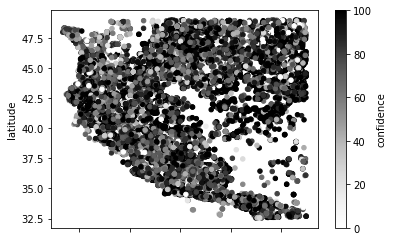

In [20]:
dfw.plot.scatter(x='longitude',y='latitude',c='confidence')
plt.show()

In [22]:
dfw.shape

(17480, 9)

In [39]:
ts = dfw.drop(columns=['latitude', 'longitude', 'confidence', 'bright_t31','frp', 'type', 'Terra', 'D'])

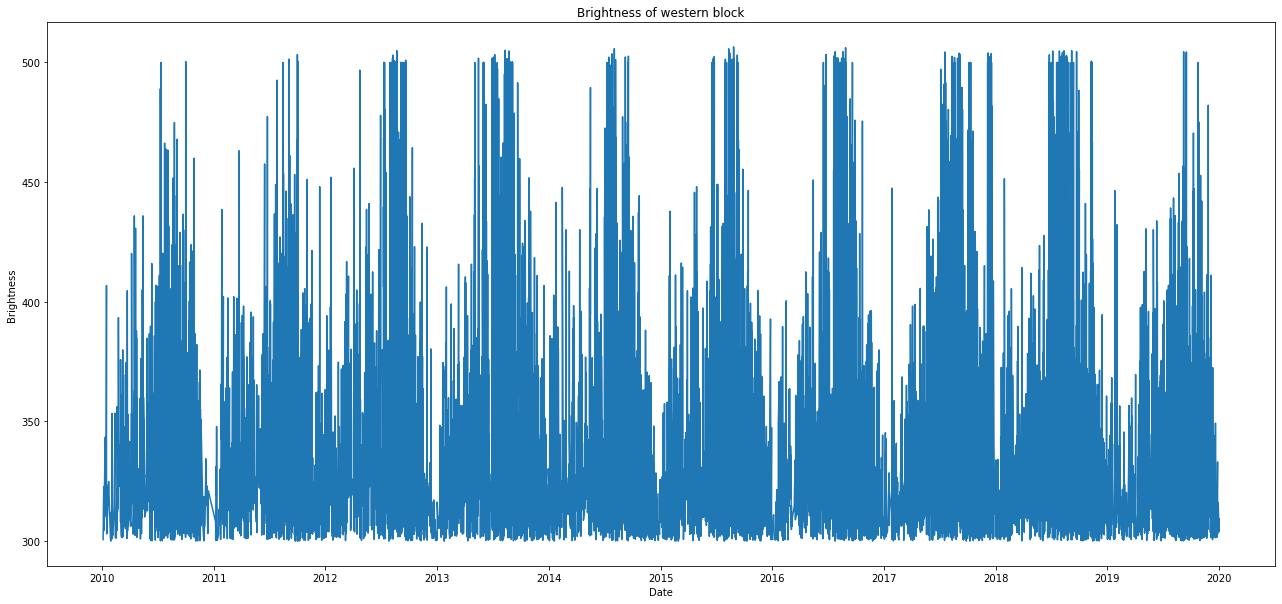

In [42]:
plt.figure(figsize=(22,10))
plt.plot(ts)
plt.title("Brightness of western block")
plt.xlabel("Date")
plt.ylabel("Brightness")
plt.tight_layout
plt.show()

In [ ]:
# Downsampling of the dataset might be required to continue from this point.
# Options are to using filter based on confidence in dfw or variations of .asfreq().

In [46]:
print(dfw['confidence'].mean())
print(dfw['confidence'].std())

81.36676201372998
22.29166528919687


In [51]:
ts1 = (dfw.loc[(dfw['confidence'] >= 90)]).drop(columns=['latitude', 
                                                         'longitude', 
                                                         'confidence', 
                                                         'bright_t31',
                                                         'frp', 
                                                         'type', 
                                                         'Terra', 
                                                         'D'])

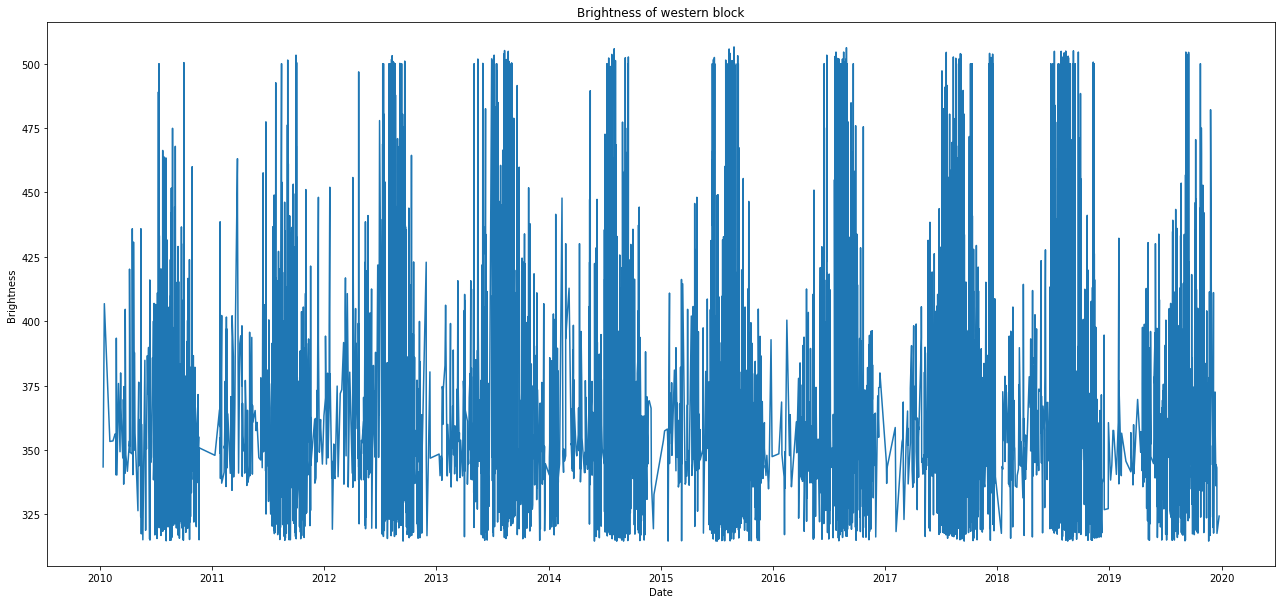

In [52]:
plt.figure(figsize=(22,10))
plt.plot(ts1)
plt.title("Brightness of western block")
plt.xlabel("Date")
plt.ylabel("Brightness")
plt.tight_layout
plt.show()

In [59]:
ts2 = dfw.asfreq(freq='W',method='bfill').drop(columns=['latitude', 
                                                         'longitude', 
                                                         'confidence', 
                                                         'bright_t31',
                                                         'frp', 
                                                         'type', 
                                                         'Terra', 
                                                         'D'])

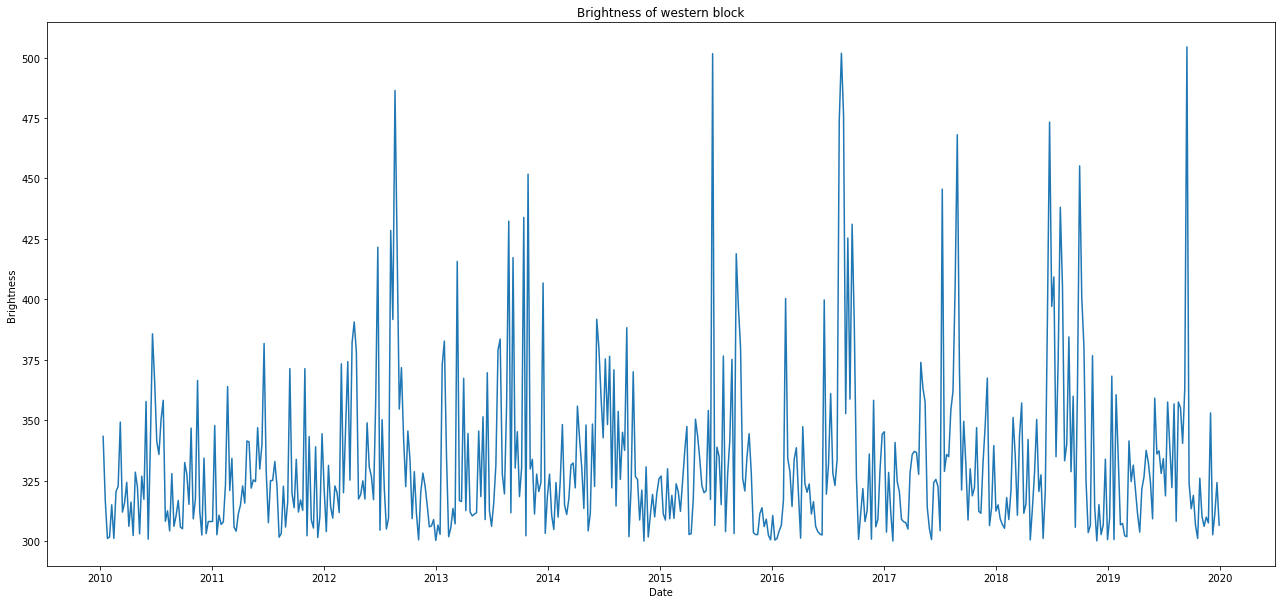

In [60]:
plt.figure(figsize=(22,10))
plt.plot(ts2)
plt.title("Brightness of western block")
plt.xlabel("Date")
plt.ylabel("Brightness")
plt.tight_layout
plt.show()

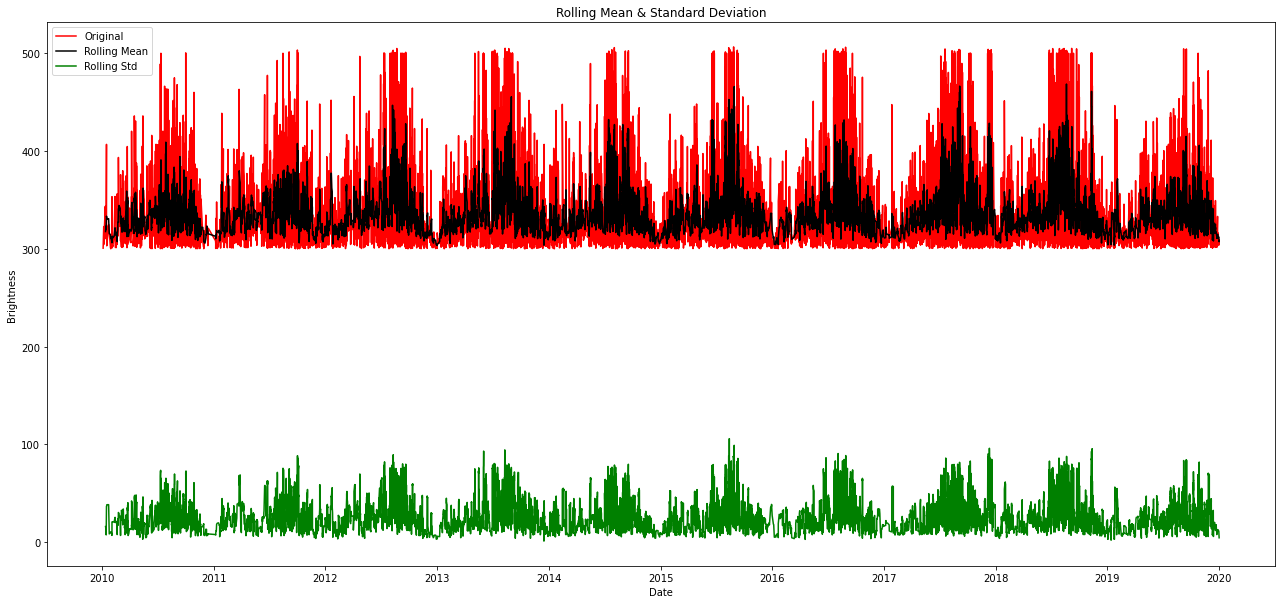

Test statistic:  -8.514632098845087
p-value:  1.142847044071873e-13
Critical Values: {'1%': -3.430725079596653, '5%': -2.861705770657148, '10%': -2.5668582354243403}


In [65]:
# adfuller library 
from statsmodels.tsa.stattools import adfuller
# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(x=ts['brightness'].values, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
# check_mean_std
def check_mean_std(ts):
    #Rolling statistics
    rolmean = ts.rolling(window=6).mean()
    rolstd = ts.rolling(window=6).std()
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Brightness")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts)
check_adfuller(ts)

In [ ]:
# From inital inpsection the data set appears stationary.
# However the mean value is not consistent. 

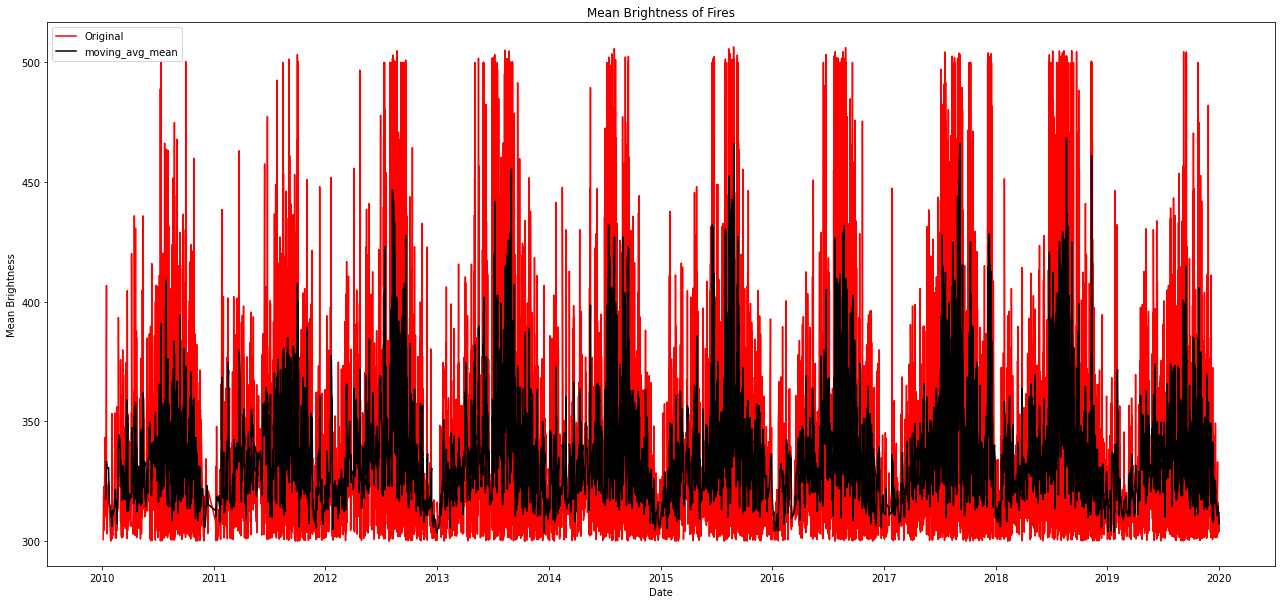

In [67]:
# Moving average method
window_size = 6
moving_avg = ts.rolling(window_size).mean()
plt.figure(figsize=(22,10))
plt.plot(ts, color = "red",label = "Original")
plt.plot(moving_avg, color='black', label = "moving_avg_mean")
plt.title("Mean Brightness of Fires")
plt.xlabel("Date")
plt.ylabel("Mean Brightness")
plt.legend()
plt.show()

In [68]:
ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.dropna(inplace=True)

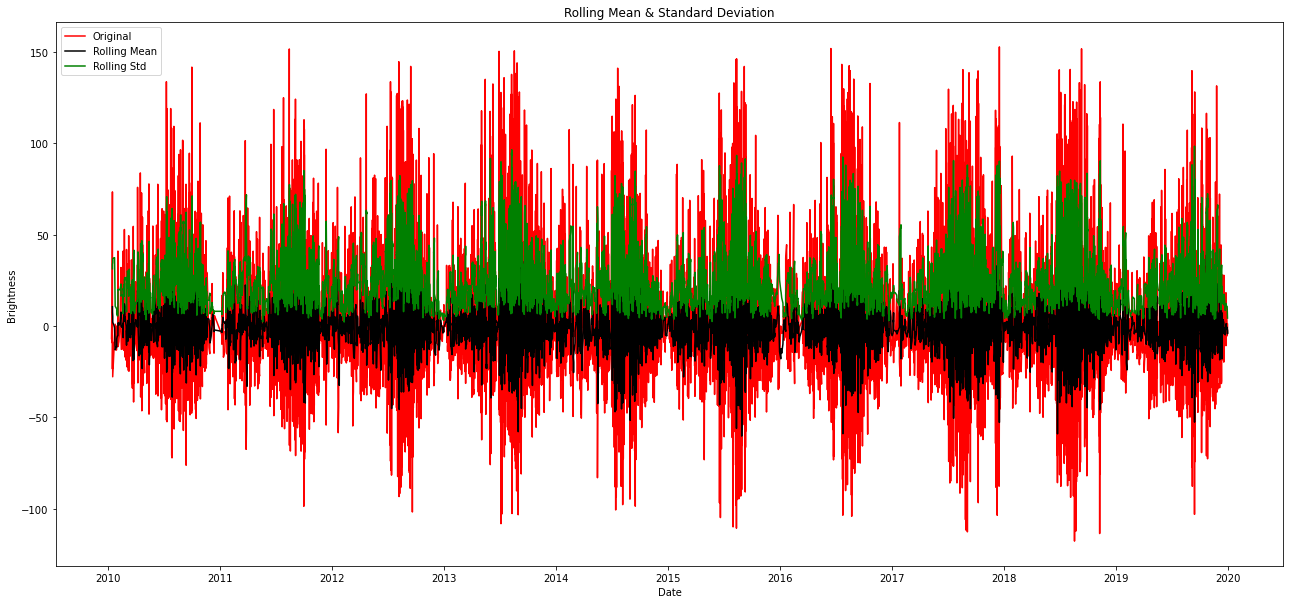

Test statistic:  -29.681345172409557
p-value:  0.0
Critical Values: {'1%': -3.4307252302532225, '5%': -2.86170583723731, '10%': -2.566858270863966}


In [70]:
check_mean_std(ts_moving_avg_diff)
check_adfuller(ts_moving_avg_diff)

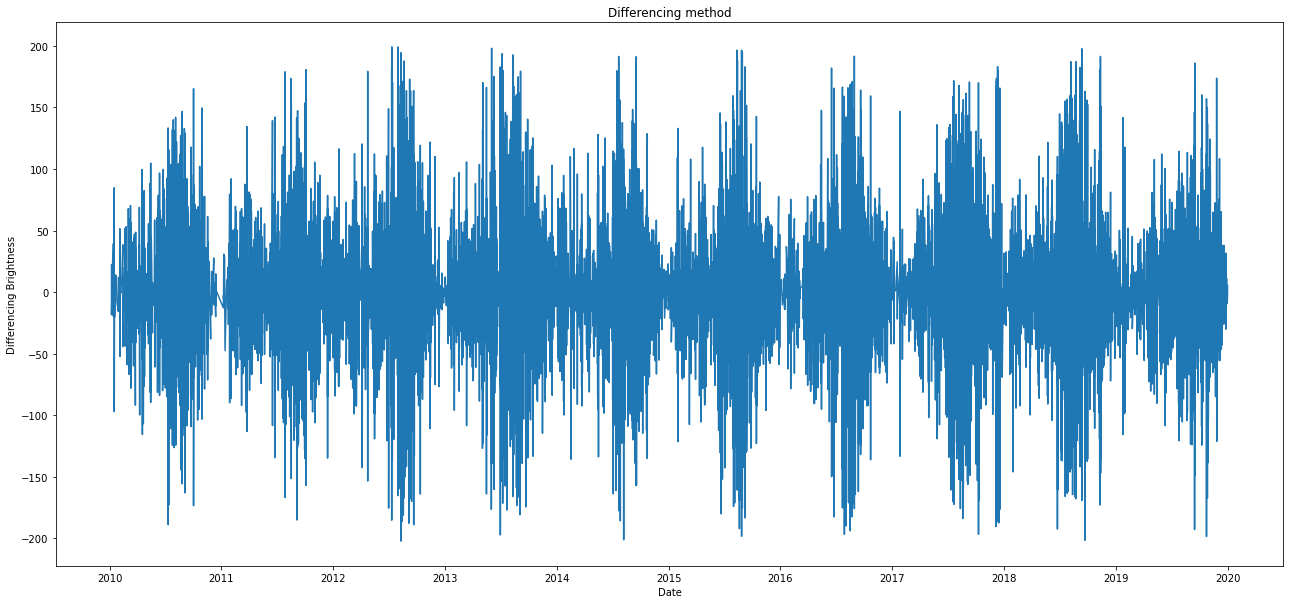

In [71]:
# differencing method
ts_diff = ts.diff()
plt.figure(figsize=(22,10))
plt.plot(ts_diff)
plt.title("Differencing method") 
plt.xlabel("Date")
plt.ylabel("Differencing Brightness")
plt.show()

In [72]:
ts_diff.dropna(inplace=True)

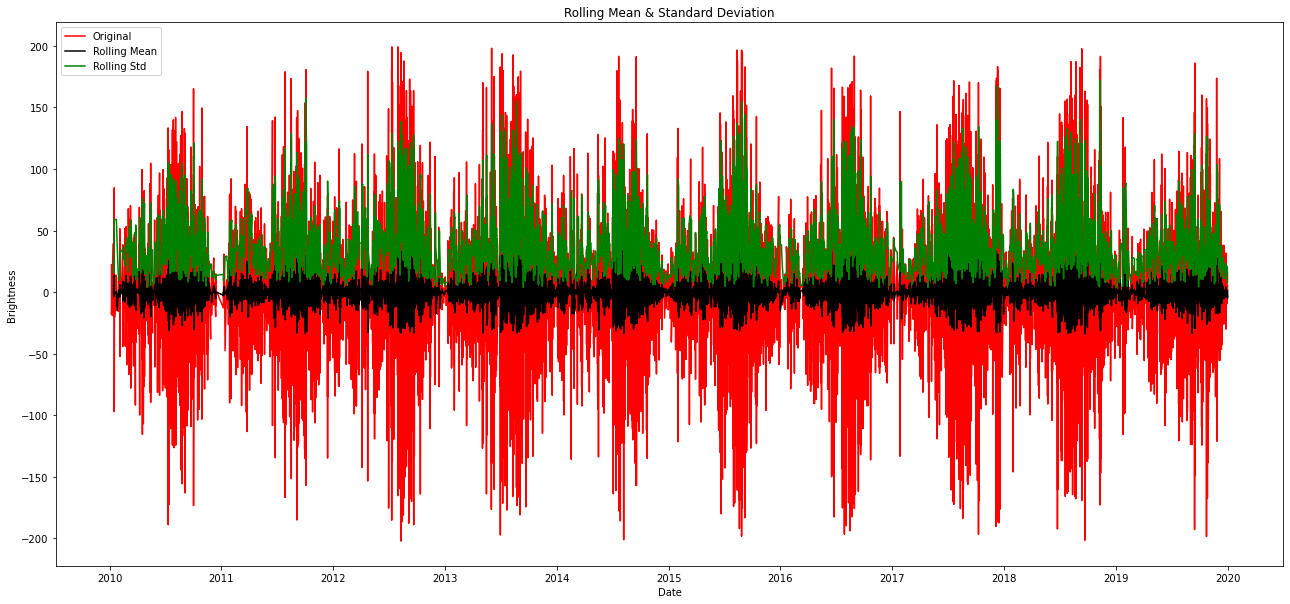

Test statistic:  -32.23622503948335
p-value:  0.0
Critical Values: {'1%': -3.430725101111613, '5%': -2.8617057801653263, '10%': -2.5668582404854017}


In [74]:
check_mean_std(ts_diff)
check_adfuller(ts_diff)

C:\Users\timos\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


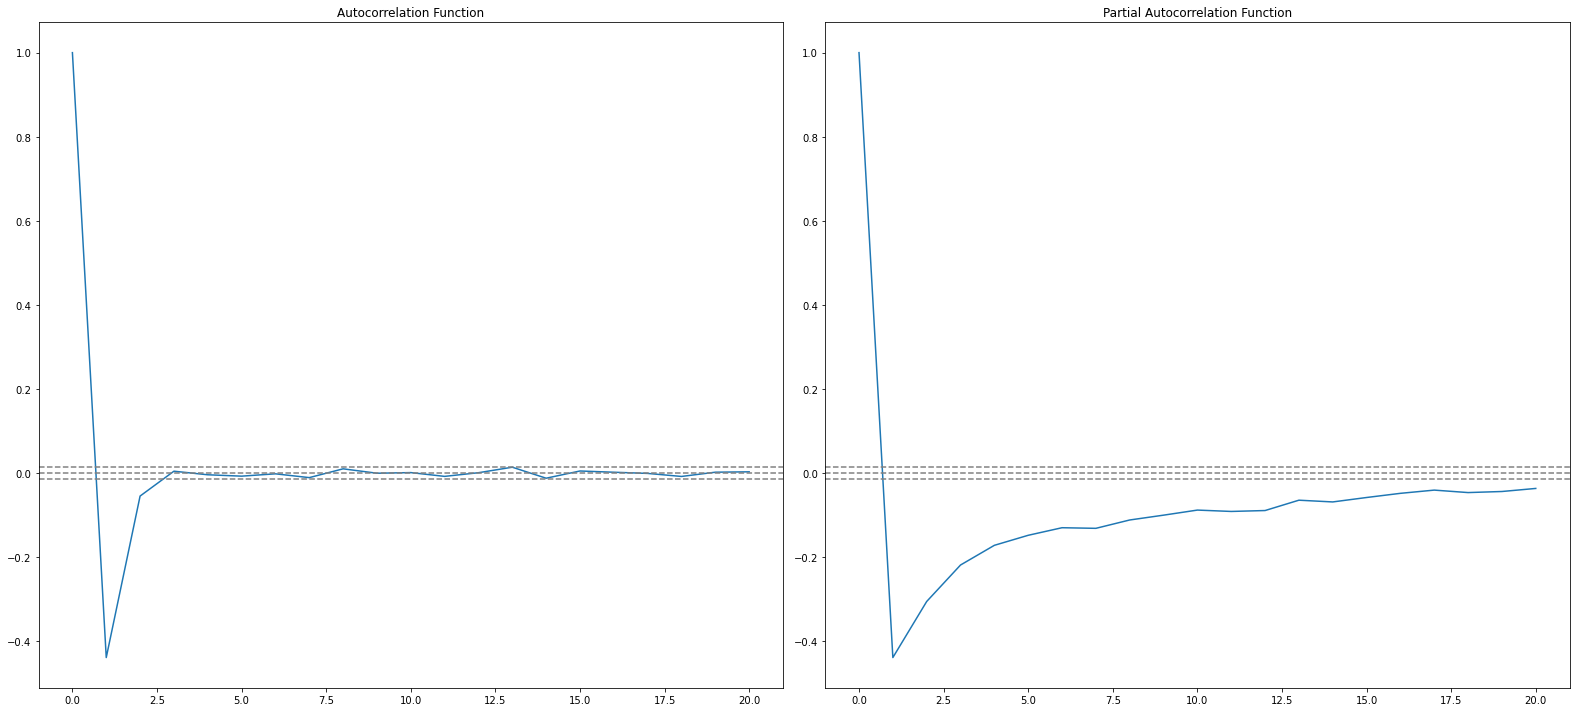

In [75]:
# ACF and PACF 
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [77]:
# Import mean_squared_error and ARIMA

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [103]:
# fit model
p = 1
d = 0
q = 1
model = ARIMA(ts, order=(p,d,q))
model_fit = model.fit()
forecast = model_fit.forecast(24)

In [104]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             brightness   No. Observations:                17480
Model:                     ARMA(1, 1)   Log Likelihood              -88137.260
Method:                       css-mle   S.D. of innovations             37.458
Date:                Tue, 12 Jan 2021   AIC                         176282.521
Time:                        23:20:31   BIC                         176313.596
Sample:                             0   HQIC                        176292.754
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              345.1243      2.233    154.545      0.000     340.747     349.501
ar.L1.brightness     0.9918      0.001    710.340      0.000       0.989       0.995
ma.L1.brightness    -0.9353      0.004   -209.829      0.000      -0.944      -0.927
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0082           +0.0000j            1.0082            0.0000
MA.1            1.0692           +0.0000j            1.0692            0.0000
-----------------------------------------------------------------------------
"""

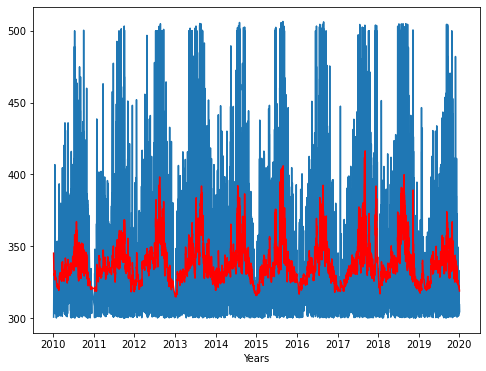

In [105]:
plt.figure(figsize=(8,6))
plt.plot(ts)
plt.plot(model_fit.predict(), color = 'red')
plt.xlabel('Years')
plt.show()

In [ ]:
# # For future use in developing distance between lat/long points 

# # from math import sin, cos, sqrt, atan2, radians

# # # Approximate radius of earth in km
# # R = 6373.0

# # lat1 = radians(52.2296756)
# # lon1 = radians(21.0122287)
# # lat2 = radians(52.406374)
# # lon2 = radians(16.9251681)

# # dlon = lon2 - lon1
# # dlat = lat2 - lat1

# # a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
# # c = 2 * atan2(sqrt(a), sqrt(1 - a))

# # distance = R * c

In [ ]:
# df2 = df2.astype('float')

In [ ]:
# # Extracting a western block from the dataset. Current method is providing a single block. Future updates could 
# # subdivide the dataset into more specific geographic representations.

# dfwest1 = df2.loc[(df2['longitude'] >= -125) & 
#                  (df2['longitude'] <= -115) & 
#                  (df2['latitude'] <= 50) & 
#                  (df2['latitude'] >= 30)]

In [ ]:
dfwest1.plot.scatter(x='longitude',y='latitude',c='confidence')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
dfwest1['brightness'].plot(ax=ax)
plt.show()

In [ ]:
df_stationary = dfwest1.brightness.diff().dropna()

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
df_stationary.plot(ax=ax)
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,8))
plot_acf(df_stationary, ax=ax1)
plot_pacf(df_stationary, ax=ax2)
plt.show()

In [ ]:
y = dfwest1.brightness

In [ ]:
type(y)

In [ ]:
# Checking to see if brightness values are stationary.

from statsmodels.tsa.stattools import kpss

kpss(y)

In [ ]:
# Import mean_squared_error and ARIMA

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
def evaluate_arima_model(data, arima_order):
    split=int(len(data) * 0.8) 
    # Make train and test variables, with 'train, test'
    train, test = data[0:split], data[split:len(data)]
    past=[x for x in train]
    # make predictions
    predictions = list()
    for i in range(len(test)):#timestep-wise comparison between test data and one-step prediction ARIMA model. 
        model = ARIMA(past, order=arima_order)
        model_fit = model.fit(disp=0)
        future = model_fit.forecast()[0]
        predictions.append(future)
        past.append(test[i])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    # Return the error
    return error

In [ ]:
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    # Iterate through p_values
    for p in p_values:
        # Iterate through d_values
        for d in d_values:
            # Iterate through q_values
            for q in q_values:
                # p, d, q iterator variables in that order
                order = (p,d,q)
                try:
                    # Make a variable called mse for the Mean squared error
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    return print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
p_values = [p for p in range(0, 5)]
d_values = [d for d in range(0, 5)]
q_values = [q for q in range(0, 5)]

In [ ]:
import warnings
warnings.filterwarnings("ignore")
evaluate_models(y, p_values, d_values, q_values)

In [ ]:
p = 3
d = 0
q = 0
model = ARIMA(y, order=(p,d,q))
model_fit = model.fit()
forecast = model_fit.forecast(24)

In [ ]:
model_fit.summary()

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(y)
plt.plot(model_fit.predict(), color = 'red')
plt.xlabel('Years')
plt.show()

In [ ]:
forecast_period = 24

date_range = pd.date_range(y.index[-1], periods = forecast_period,
                           freq='MS')
date_range.strftime('%Y-%m-%d').tolist()

In [ ]:
future_months = pd.DataFrame(date_range, columns = ['Month'])

In [ ]:
future_months['Month'] = pd.to_datetime(future_months['Month'])

In [ ]:
future_months.set_index('Month', inplace = True)

In [ ]:
future_months['Prediction'] = forecast[0]

In [ ]:
# Needs work

plt.figure(figsize=(8,6))
plt.plot(y)
plt.plot(y.append(future_months['Prediction']))
plt.show()